In [14]:
import pandas as pd
from datetime import datetime

# Загрузка данных
file_path = '~/ml_hw/data/marketing_campaign.csv'
data = pd.read_csv(file_path, sep=';')

# Количество жалоб
number_of_complaints = data['Complain'].sum()

# Переводим дату последней покупки в формат datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Устанавливаем сегодняшнюю дату для сравнения
reference_date = pd.Timestamp('2024-02-13')

# Определяем покупателей, совершивших покупку за последние два года
recent_customers = data[(data['Dt_Customer'] >= reference_date - pd.DateOffset(years=2))]

# Вычисляем средний возраст покупателей, совершивших покупку за последние два года
average_age_recent_customers = recent_customers['Year_Birth'].apply(lambda x: reference_date.year - x).mean()

# Вычисляем средний возраст всех людей в датасете
average_age_all_customers = data['Year_Birth'].apply(lambda x: reference_date.year - x).mean()

# Выводим результаты
print(f'Количество жалоб: {number_of_complaints}')
print(f'Средний возраст покупателей за последние два года: {average_age_recent_customers:.2f}') #таких нет, надеюсь так и задумано
print(f'Средний возраст всех людей в датасете: {average_age_all_customers:.2f}')

Количество жалоб: 21
Средний возраст покупателей за последние два года: nan
Средний возраст всех людей в датасете: 55.19


/tmp/ipykernel_143760/3317832635.py:12: UserWarning: Parsing '21.08.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
/tmp/ipykernel_143760/3317832635.py:12: UserWarning: Parsing '19.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
/tmp/ipykernel_143760/3317832635.py:12: UserWarning: Parsing '13.11.2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
/tmp/ipykernel_143760/3317832635.py:12: UserWarning: Parsing '13.03.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
/tmp/ipykernel_143760/3317832635.py:12: UserWarning: Parsing '15.11.

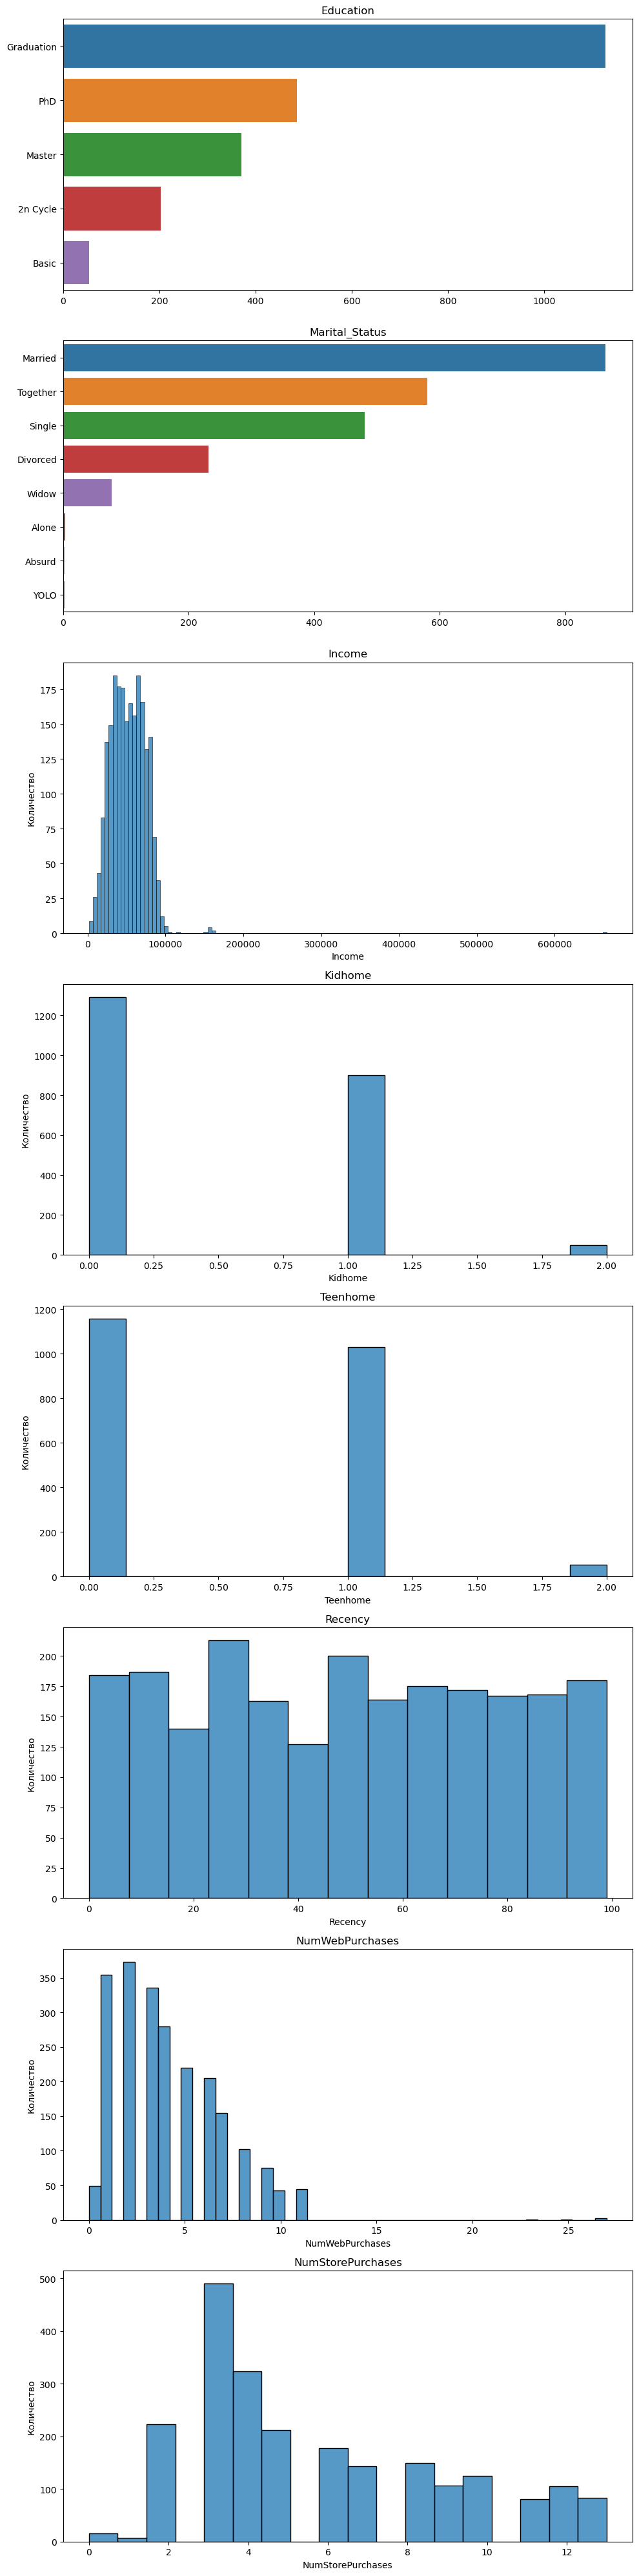

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Загрузим данные снова для безопасности, так как мы не сохраняли изменения
file_path = '~/ml_hw/data/marketing_campaign.csv'
data = pd.read_csv(file_path, sep=';')

# Вычислим возраст клиентов
reference_date = pd.Timestamp('2024-02-13')
data['Age'] = reference_date.year - data['Year_Birth']

# Функция для построения графиков для категориальных переменных
def plot_categorical(column, ax):
    order = data[column].value_counts().index
    sns.countplot(y=column, data=data, order=order, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Функция для построения графиков для числовых переменных
def plot_numeric(column, ax):
    sns.histplot(data[column], kde=False, ax=ax)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Количество')

# Создание фигуры и осей для графиков
fig, axs = plt.subplots(8, 1, figsize=(10, 40))

# Построение графиков для категориальных переменных
plot_categorical('Education', axs[0])
plot_categorical('Marital_Status', axs[1])

# Построение графиков для численных переменных
plot_numeric('Income', axs[2])
plot_numeric('Kidhome', axs[3])
plot_numeric('Teenhome', axs[4])
plot_numeric('Recency', axs[5])
plot_numeric('NumWebPurchases', axs[6])
plot_numeric('NumStorePurchases', axs[7])

# Автоматическая корректировка отступов
plt.tight_layout()
plt.show()

In [16]:
#Выводы для графиков выше

#Не придумал что здесь особо писать, из очевидного клиенты в основном с высшим образованием, покупки делают вместе с супругом/супругой
#Из неочевидного все графики кроме инкама отражают нормальное распределение